In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
column_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df = pd.read_csv("../data/nasdaq/AAPL.csv",skiprows=3,names=column_names)
df.head(10)

,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
1,2010-01-05,6.443016,6.479382,6.409054,6.449628,601904800
2,2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
3,2010-01-07,6.328812,6.371490,6.282829,6.363976,477131200
4,2010-01-08,6.370885,6.371486,6.283127,6.320394,447610800
5,2010-01-11,6.314685,6.401542,6.264795,6.395531,462229600
6,2010-01-12,6.242855,6.304467,6.203785,6.287035,594459600
7,2010-01-13,6.330915,6.339331,6.134061,6.247366,605892000
8,2010-01-14,6.294247,6.325203,6.281925,6.314684,432894000
9,2010-01-15,6.189058,6.359465,6.187255,6.339329,594067600


In [18]:
#convert date and set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(10)

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443016,6.479382,6.409054,6.449628,601904800
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328812,6.371490,6.282829,6.363976,477131200
2010-01-08,6.370885,6.371486,6.283127,6.320394,447610800
2010-01-11,6.314685,6.401542,6.264795,6.395531,462229600
2010-01-12,6.242855,6.304467,6.203785,6.287035,594459600
2010-01-13,6.330915,6.339331,6.134061,6.247366,605892000
2010-01-14,6.294247,6.325203,6.281925,6.314684,432894000


In [19]:
df = df.apply(pd.to_numeric,errors='coerce')

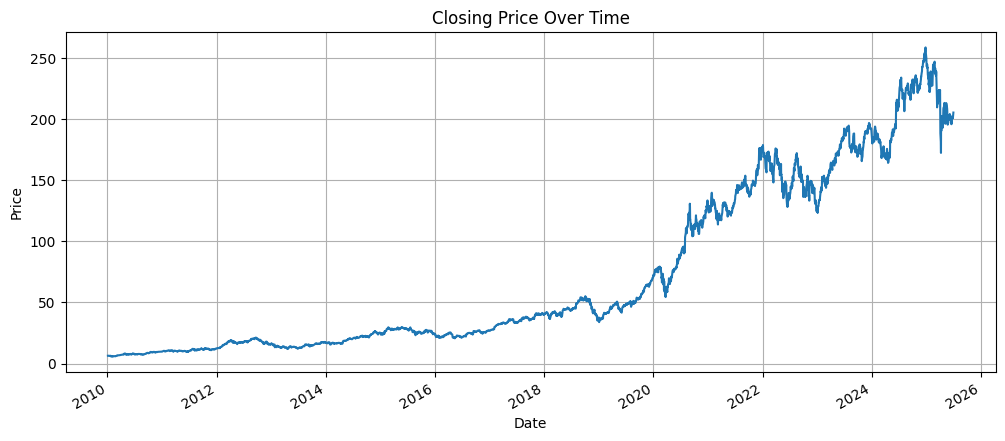

In [20]:
df['Close'].plot(figsize=(12,5),title='Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [38]:
df['Close'].std

<bound method Series.std of Date
2010-01-04      6.431896
2010-01-05      6.443016
2010-01-06      6.340531
2010-01-07      6.328812
2010-01-08      6.370885
                 ...    
2025-06-24    200.300003
2025-06-25    201.559998
2025-06-26    201.000000
2025-06-27    201.080002
2025-06-30    205.169998
Name: Close, Length: 3896, dtype: float64>

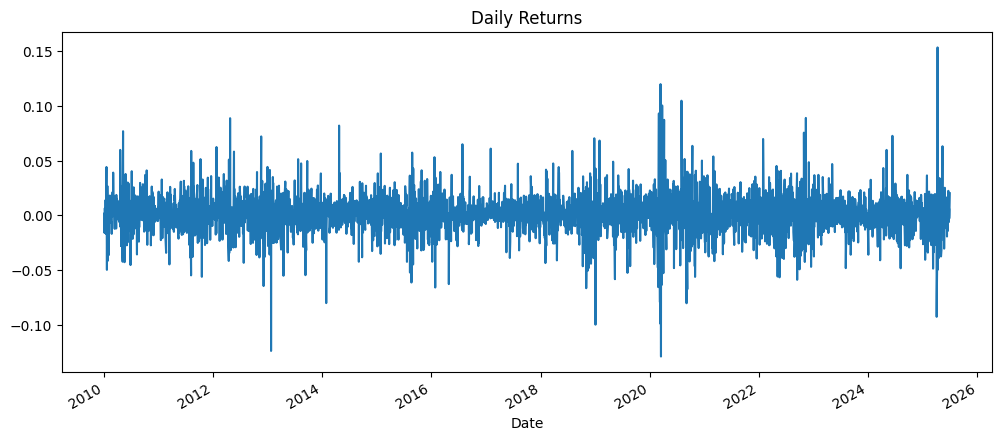

In [22]:
#Calculate Daily Return
df['Daily Return'] = df['Close'].pct_change()
df['Daily Return'].plot(figsize=(12, 5), title='Daily Returns')
plt.show()

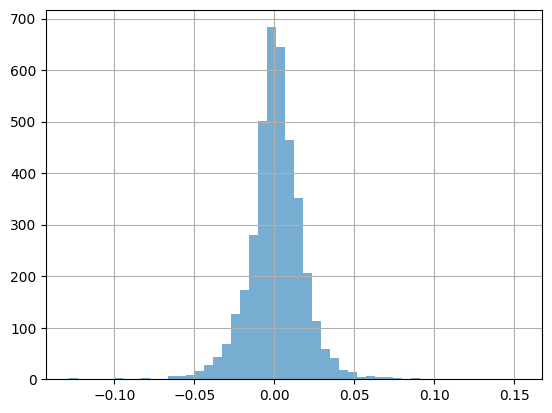

In [23]:
df['Daily Return'].hist(bins=50, alpha=0.6)
plt.show()

In [26]:
#Calculate Moving Average
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
df.head()

,Close,High,Low,Open,Volume,Daily Return,MA20,MA50
Date,,,,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600,NaN,NaN,NaN
2010-01-05,6.443016,6.479382,6.409054,6.449628,601904800,0.001729,NaN,NaN
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000,-0.015906,NaN,NaN
2010-01-07,6.328812,6.371490,6.282829,6.363976,477131200,-0.001848,NaN,NaN
2010-01-08,6.370885,6.371486,6.283127,6.320394,447610800,0.006648,NaN,NaN


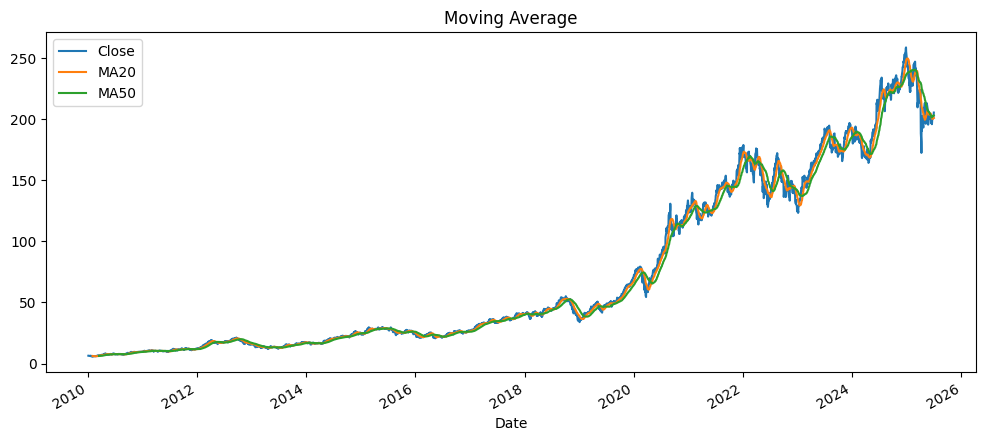

In [28]:
df[['Close','MA20','MA50']].plot(figsize=(12,5),title='Moving Average')
plt.show()

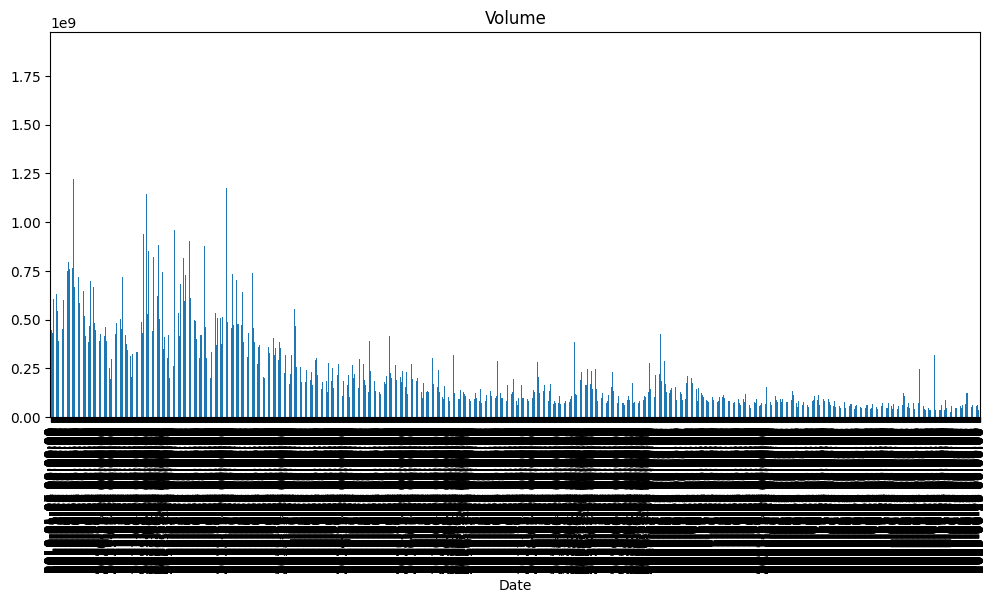

In [30]:
df['Volume'].plot(kind='bar',figsize=(12,5),title='Volume')
plt.show()

Text(0.5, 1.0, 'Price and Volume')

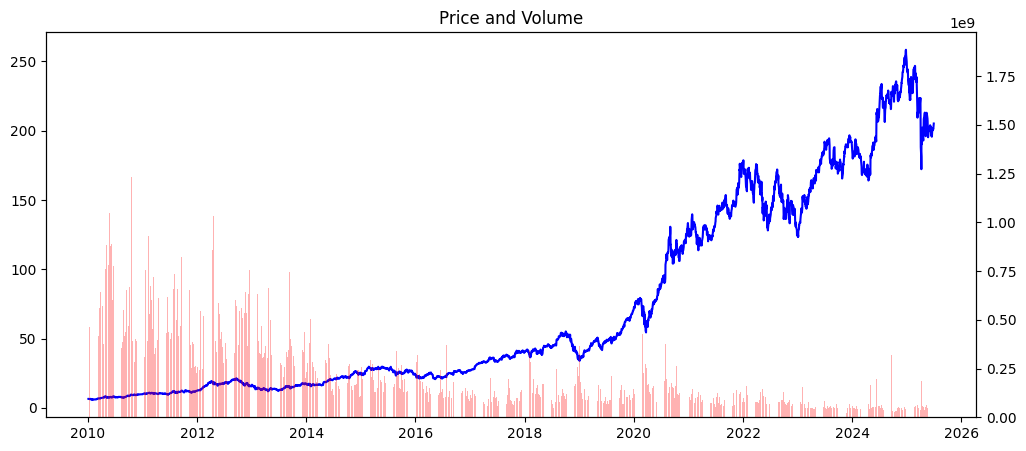

In [35]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df['Close'],color='blue')
ax2 = ax1.twinx()
ax2.bar(df.index,df['Volume'],color='red',alpha=0.3)
ax1.set_title('Price and Volume')

In [36]:
df.to_csv("../cleaned_data/cleaned_AAPL.csv")